<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

# Decision Trees

## Objectives

*   Develop a classification model using Decision Tree Algorithm


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#about_dataset">About the dataset</a></li>
        <li><a href="https://#downloading_data">Downloading the Data</a></li>
        <li><a href="https://#pre-processing">Pre-processing</a></li>
        <li><a href="https://#setting_up_tree">Setting up the Decision Tree</a></li>
        <li><a href="https://#modeling">Modeling</a></li>
        <li><a href="https://#prediction">Prediction</a></li>
        <li><a href="https://#evaluation">Evaluation</a></li>
        <li><a href="https://#visualization">Visualization</a></li>
    </ol>
</div>
<br>
<hr>


Import the Following Libraries:

<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>


if you uisng you own version comment out


In [42]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [43]:
import sys
import numpy as np 
import pandas as pd # type: ignore
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

<div id="about_dataset">
    <h2>About the dataset</h2>
    This a medical research data compilation for a study. Data have been collected about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    This multiclass classifier model finds out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.
    <br>
    <br>
</div>


<div id="downloading_data"> 
    <h2>Downloading the Data</h2>
    To download the data, we  use pandas library to read it directly into a dataframe from IBM Object Storage.
</div>


In [44]:
my_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")
my_data.head(500)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


<div id="practice"> 
    <h3>Practice</h3> 
    What is the size of data? 
</div>


In [45]:
print("Data Shape:", my_data.shape)

Data Shape: (200, 6)


<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>


Using <b>my_data</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>


Remove the column containing the target name since it doesn't contain numeric values.


In [46]:
X = my_data[["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]].values
X[0:10]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368]], dtype=object)

Some features in this dataset are categorical, such as **Sex** or **BP**. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using the **LabelEncoder() method**
to convert the categorical variable into dummy/indicator variables.


In [47]:
from sklearn import preprocessing

sex_col = preprocessing.LabelEncoder()
sex_col.fit(["F", "M"])
X[:,1] = sex_col.transform(X[:,1])

BP_col = preprocessing.LabelEncoder()
BP_col.fit(["LOW", "NORMAL", "HIGH"])
X[:,2] = BP_col.transform(X[:,2])

cho_col = preprocessing.LabelEncoder()
cho_col.fit(["NORMAL", "HIGH"])
X[:,3] = cho_col.transform(X[:,3])

X[0:10]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043],
       [22, 0, 2, 0, 8.607],
       [49, 0, 2, 0, 16.275],
       [41, 1, 1, 0, 11.037],
       [60, 1, 2, 0, 15.171],
       [43, 1, 1, 1, 19.368]], dtype=object)

Now we can fill the target variable.


In [48]:
y = my_data["Drug"]
y[0:10]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
5    drugX
6    drugY
7    drugC
8    drugY
9    drugY
Name: Drug, dtype: object

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We use <b>train/test split</b> on our <b>decision tree</b>.
</div>


In [49]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.


In [50]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

<h3>Practice</h3>
Print the shape of X_trainset and y_trainset. Ensure that the dimensions match.


In [51]:
print("X_trainset =", X_trainset.shape)
print("y_testset =", y_trainset.shape)

X_trainset = (140, 5)
y_testset = (140,)


Print the shape of X_testset and y_testset. Ensure that the dimensions match.


In [52]:
print("X_testset =", X_testset.shape)
print("y_testset =", y_testset.shape)

X_testset = (60, 5)
y_testset = (60,)


<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


In [53]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>


In [54]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    We make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>


In [55]:
predTree = drugTree.predict(X_testset)

We print out <b>predTree</b> and <b>y_testset</b> to visually compare the predictions to the actual values.


In [56]:
print (predTree [0:5])
print (y_testset [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    We import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>


In [57]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


<hr>

<div id="visualization">
    <h2>Visualization</h2>

Let's visualize the tree

</div>


In [58]:
%pip install pydotplus
%pip install graphviz


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


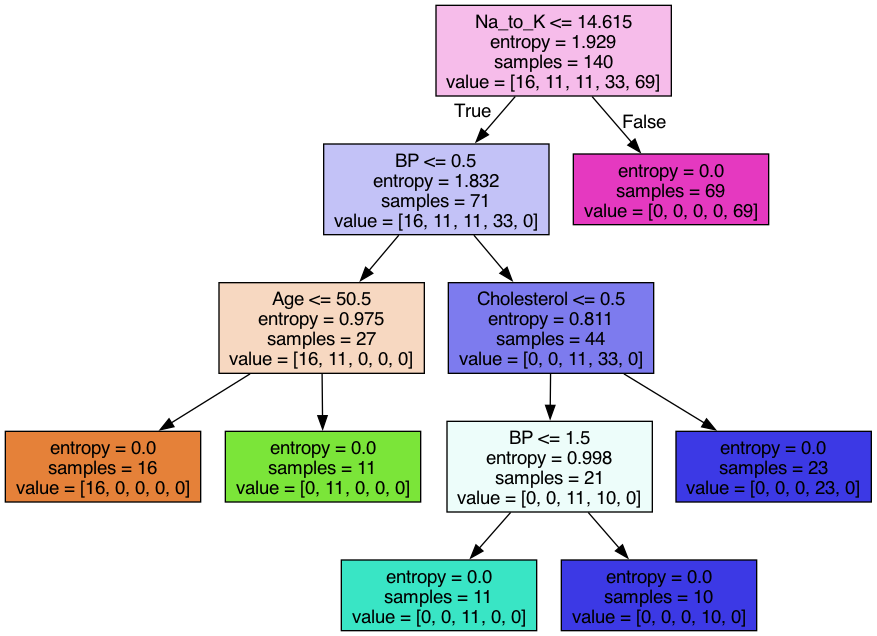

In [60]:
from sklearn.tree import export_graphviz
export_graphviz(drugTree, out_file='tree.dot', filled=True, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])
!dot -Tpng tree.dot -o tree.png


from IPython.display import Image
Image(filename='tree.png')


## Author

Saeed Aghabozorgi

<a href="http://www.linkedin.com/in/idaraabasiudoh" target="_blank">Idara-Abasi Udoh</a>

### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">Joseph Santarcangelo</a>

<a href="https://www.linkedin.com/in/richard-ye/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">Richard Ye</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                               |
| ----------------- | ------- | ---------- | ------------------------------------------------ |
| 2024-08-09        | 2.4     | Idara-Abasi Udoh | Project completion                         |
| 2022-05-24        | 2.3     | Richard Ye | Fixed ability to work in JupyterLite and locally |
| 2020-11-20        | 2.2     | Lakshmi    | Changed import statement of StringIO             |
| 2020-11-03        | 2.1     | Lakshmi    | Changed URL of the csv                           |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab               |
|                   |         |            |                                                  |
|                   |         |            |                                                  |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
